100%|██████████| 9.91M/9.91M [00:01<00:00, 6.21MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.67MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.4MB/s]


Device: cuda
SGD Epoch 1, Loss = 0.4702
SGD Epoch 2, Loss = 0.3316
SGD Epoch 3, Loss = 0.3109
SGD Epoch 4, Loss = 0.2996
SGD Epoch 5, Loss = 0.2925
SGD Epoch 6, Loss = 0.2874
SGD Epoch 7, Loss = 0.2834
SGD Epoch 8, Loss = 0.2800
SGD Epoch 9, Loss = 0.2775
SGD Epoch 10, Loss = 0.2750
SGD Epoch 11, Loss = 0.2729
SGD Epoch 12, Loss = 0.2713
SGD Epoch 13, Loss = 0.2695
SGD Epoch 14, Loss = 0.2681
SGD Epoch 15, Loss = 0.2668
SGD Epoch 16, Loss = 0.2656
SGD Epoch 17, Loss = 0.2646
SGD Epoch 18, Loss = 0.2635
SGD Epoch 19, Loss = 0.2625
SGD Epoch 20, Loss = 0.2619
SGD Epoch 21, Loss = 0.2608
SGD Epoch 22, Loss = 0.2600
SGD Epoch 23, Loss = 0.2593
SGD Epoch 24, Loss = 0.2587
SGD Epoch 25, Loss = 0.2578
SGD Epoch 26, Loss = 0.2571
SGD Epoch 27, Loss = 0.2566
SGD Epoch 28, Loss = 0.2560
SGD Epoch 29, Loss = 0.2559
SGD Epoch 30, Loss = 0.2548
ADAM Epoch 1, Loss = 0.3874
ADAM Epoch 2, Loss = 0.2936
ADAM Epoch 3, Loss = 0.2820
ADAM Epoch 4, Loss = 0.2764
ADAM Epoch 5, Loss = 0.2713
ADAM Epoch 6, Lo

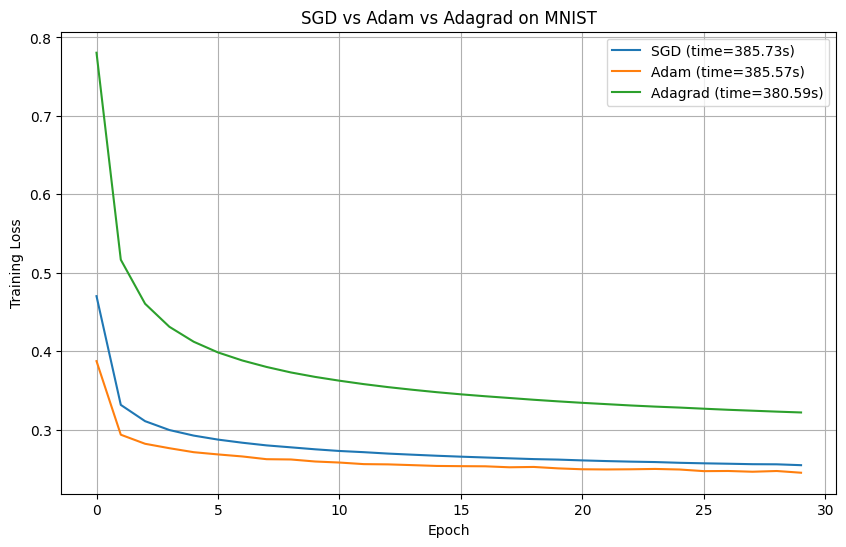

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

# -----------------------------
# 1. Load MNIST Dataset
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# -----------------------------
# 2. Simple Logistic Regression Model
# -----------------------------
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.linear(x)

# -----------------------------
# 3. Training Function
# -----------------------------
def train_model(optimizer_name):
    model = LogisticRegression().to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == "adam":
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_name == "Adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-4)

    losses = []
    start_time = time.time()

    for epoch in range(30):  # enough to show difference
        running_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"{optimizer_name.upper()} Epoch {epoch+1}, Loss = {avg_loss:.4f}")

    end_time = time.time()
    return losses, end_time - start_time

# -----------------------------
# 4. Train all optimizers
# -----------------------------
sgd_losses, sgd_time = train_model("sgd")
adam_losses, adam_time = train_model("adam")
Adagrad_losses, Adagrad_time = train_model("Adagrad")

# -----------------------------
# 5. Plot the loss curves
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(sgd_losses, label=f"SGD (time={sgd_time:.2f}s)")
plt.plot(adam_losses, label=f"Adam (time={adam_time:.2f}s)")
plt.plot(Adagrad_losses, label=f"Adagrad (time={Adagrad_time:.2f}s)")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("SGD vs Adam vs Adagrad on MNIST")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install torchtext

In [ ]:
!pip install datasets


Using device: cuda
SGD Epoch 1, Loss=0.5460
SGD Epoch 2, Loss=0.4390
SGD Epoch 3, Loss=0.4002
SGD Epoch 4, Loss=0.3768
SGD Epoch 5, Loss=0.3595
SGD Epoch 6, Loss=0.3458
SGD Epoch 7, Loss=0.3352
SGD Epoch 8, Loss=0.3286
SGD Epoch 9, Loss=0.3174
SGD Epoch 10, Loss=0.3117
SGD Epoch 11, Loss=0.3056
SGD Epoch 12, Loss=0.2989
SGD Epoch 13, Loss=0.2945
SGD Epoch 14, Loss=0.2893
SGD Epoch 15, Loss=0.2853
SGD Epoch 16, Loss=0.2816
SGD Epoch 17, Loss=0.2791
SGD Epoch 18, Loss=0.2739
SGD Epoch 19, Loss=0.2704
SGD Epoch 20, Loss=0.2704
SGD Epoch 21, Loss=0.2658
SGD Epoch 22, Loss=0.2627
SGD Epoch 23, Loss=0.2605
SGD Epoch 24, Loss=0.2583
SGD Epoch 25, Loss=0.2553
SGD Epoch 26, Loss=0.2528
SGD Epoch 27, Loss=0.2519
SGD Epoch 28, Loss=0.2486
SGD Epoch 29, Loss=0.2468
SGD Epoch 30, Loss=0.2447
ADAM Epoch 1, Loss=0.4184
ADAM Epoch 2, Loss=0.2803
ADAM Epoch 3, Loss=0.2353
ADAM Epoch 4, Loss=0.2083
ADAM Epoch 5, Loss=0.1886
ADAM Epoch 6, Loss=0.1739
ADAM Epoch 7, Loss=0.1613
ADAM Epoch 8, Loss=0.1510
AD

NameError: name 'adagrad_time' is not defined

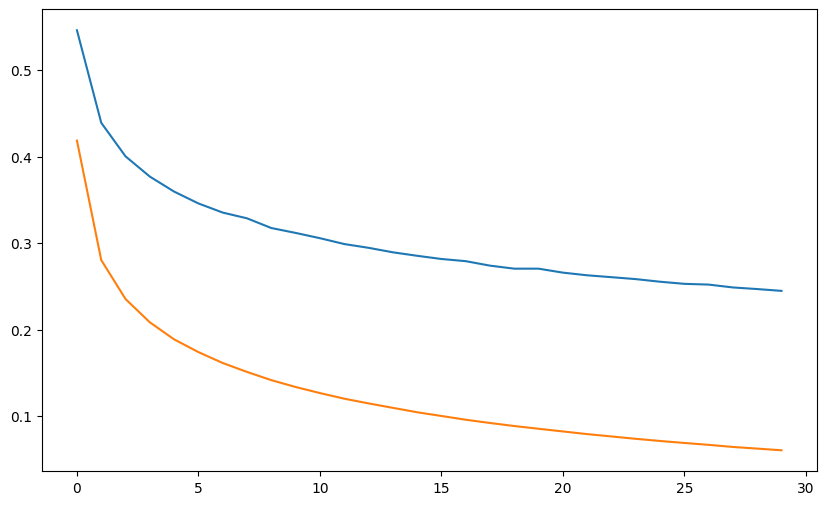

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import re

# -----------------------------
# Force GPU on Kaggle
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------
# 1. Load IMDB dataset
# -----------------------------
dataset = load_dataset("imdb")
train_texts = dataset["train"]["text"]
train_labels = dataset["train"]["label"]
test_texts  = dataset["test"]["text"]
test_labels = dataset["test"]["label"]

# -----------------------------
# 2. Tokenizer + Build Vocabulary
# -----------------------------
def tokenize(text):
    text = text.lower()
    return re.findall(r"[a-z']+", text)

counter = Counter()
for text in train_texts:
    counter.update(tokenize(text))

vocab_size = 10000
vocab = {word: i for i, (word, _) in enumerate(counter.most_common(vocab_size))}

# -----------------------------
# 3. BOW vectorizer (GPU enabled)
# -----------------------------
def text_to_bow(text):
    vec = torch.zeros(vocab_size)   # CPU only
    for tok in tokenize(text):
        if tok in vocab:
            vec[vocab[tok]] += 1
    return vec

# -----------------------------
# 4. Dataset wrapper
# -----------------------------
class BOWDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        bow = text_to_bow(self.texts[idx])          # CPU
        y = torch.tensor(self.labels[idx], dtype=torch.float32)   # CPU
        return bow, y



train_data = BOWDataset(train_texts, train_labels)
test_data  = BOWDataset(test_texts, test_labels)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True)
test_loader  = DataLoader(test_data, batch_size=32, pin_memory=True)

# -----------------------------
# 5. Logistic Regression Model
# -----------------------------
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(vocab_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# -----------------------------
# 6. Training Function
# -----------------------------
# -----------------------------
# 6. Training Function
# -----------------------------
def train_model(optimizer_name):
    model = LogisticRegression().to(device)
    criterion = nn.BCELoss()

    if optimizer_name == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=0.01)

    elif optimizer_name == "adam":
        optimizer = optim.Adam(model.parameters(), lr=0.001)

    elif optimizer_name == "adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=0.01)  # <-- CHANGED HERE

    losses = []
    start = time.time()

    for epoch in range(30):
        running_loss = 0
        for X, y in train_loader:
            X = X.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True).view(-1,1)

            optimizer.zero_grad()
            preds = model(X)
            loss = criterion(preds, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"{optimizer_name.upper()} Epoch {epoch+1}, Loss={avg_loss:.4f}")

    return losses, time.time() - start


# -----------------------------
# 7. Train optimizers
# -----------------------------
sgd_losses, sgd_time     = train_model("sgd")
adam_losses, adam_time   = train_model("adam")
adagrad_losses, adamw_time = train_model("adagrad")

# -----------------------------
# 8. Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(sgd_losses, label=f"SGD (t={sgd_time:.2f}s)")
plt.plot(adam_losses, label=f"Adam (t={adam_time:.2f}s)")
plt.plot(adagrad_losses, label=f"Adagrad (t={adagrad_time:.2f}s)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SGD vs Adam vs Adagrad on IMDB (10k BOW Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt

# ----------------------------
# 1. CIFAR-10 Loading
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# ----------------------------
# 2. MLP Model Definition
# ----------------------------
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# ----------------------------
# 3. Training Loop (records loss + time)
# ----------------------------
def train_model(optimizer_name):
    model = MLP().cuda()
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_name == "AMSGrad":
        optimizer = optim.Adam(model.parameters(), lr=0.001, amsgrad=True)
    elif optimizer_name == "RMSProp":
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)
    else:
        raise ValueError("Unknown optimizer")

    loss_list = []
    time_list = []
    start_time = time.time()

    model.train()
    for batch_idx, (x, y) in enumerate(train_loader):
        x, y = x.cuda(), y.cuda()

        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        time_list.append(time.time() - start_time)

        # Train only ~2 epochs to show convergence difference
        if batch_idx == 800:
            break

    return loss_list, time_list


# ----------------------------
# 4. Run all optimizers
# ----------------------------
opt_names = ["Adam", "AMSGrad", "RMSProp"]
results = {}

for opt in opt_names:
    print(f"Training with {opt} ...")
    losses, times = train_model(opt)
    results[opt] = (losses, times)

# ----------------------------
# 5. Plot: Loss vs Time
# ----------------------------
plt.figure(figsize=(9,5))
for opt in opt_names:
    losses, times = results[opt]
    plt.plot(times, losses, label=opt)

plt.xlabel("Time (seconds)")
plt.ylabel("Training Loss")
plt.title("Optimizer Convergence on CIFAR-10 (MLP)")
plt.legend()
plt.grid(True)
plt.show()


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 448kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.15MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.7MB/s]

Training with Adam ...


RuntimeError: shape '[-1, 3072]' is invalid for input of size 100352


Training using Adam ...

Training using AMSGrad ...

Training using RMSProp ...


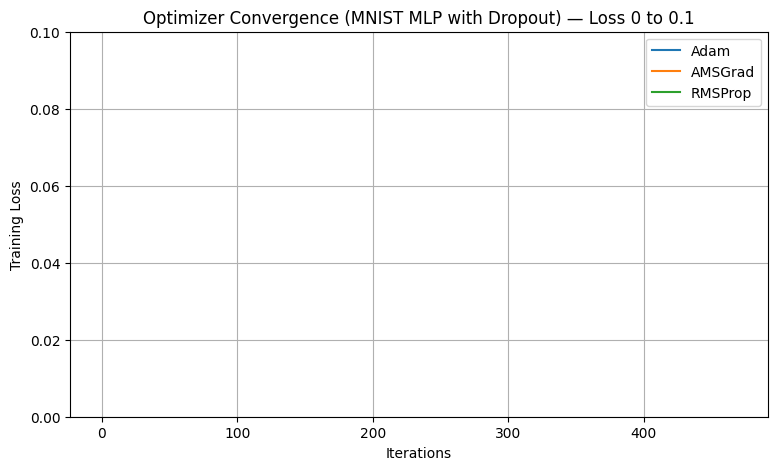

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load MNIST
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# ----------------------------
# 2. MLP Model with Dropout
# ----------------------------
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)   # <<< Dropout Added

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)       # <<< Dropout after first hidden layer
        x = self.relu(self.fc2(x))
        x = self.dropout(x)       # <<< Dropout after second hidden layer
        return self.fc3(x)

# ----------------------------
# 3. Training function
# ----------------------------
def train_model(optimizer_name):
    model = MLP().cuda()
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optimizer_name == "AMSGrad":
        optimizer = optim.Adam(model.parameters(), lr=0.01, amsgrad=True)
    elif optimizer_name == "RMSProp":
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    else:
        raise ValueError("Unknown optimizer")

    losses = []

    model.train()
    for batch_idx, (x, y) in enumerate(train_loader):
        x, y = x.cuda(), y.cuda()

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        # Train only ~2 epochs to compare convergence
        if batch_idx == 800:
            break

    return losses


# ----------------------------
# 4. Run all optimizers
# ----------------------------
optimizers = ["Adam", "AMSGrad", "RMSProp"]
results = {}

for opt in optimizers:
    print(f"\nTraining using {opt} ...")
    loss_list = train_model(opt)
    results[opt] = loss_list

# ----------------------------
# 5. Plot (Loss 0–0.1 vs Iterations)
# ----------------------------
plt.figure(figsize=(9,5))

for opt in optimizers:
    losses = results[opt]
    iterations = list(range(len(losses)))
    plt.plot(iterations, losses, label=opt)

plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Optimizer Convergence (MNIST MLP with Dropout) — Loss 0 to 0.1")
plt.ylim(0, 1)
plt.xlim(0, 200)
plt.legend()
plt.grid(True)
plt.show()


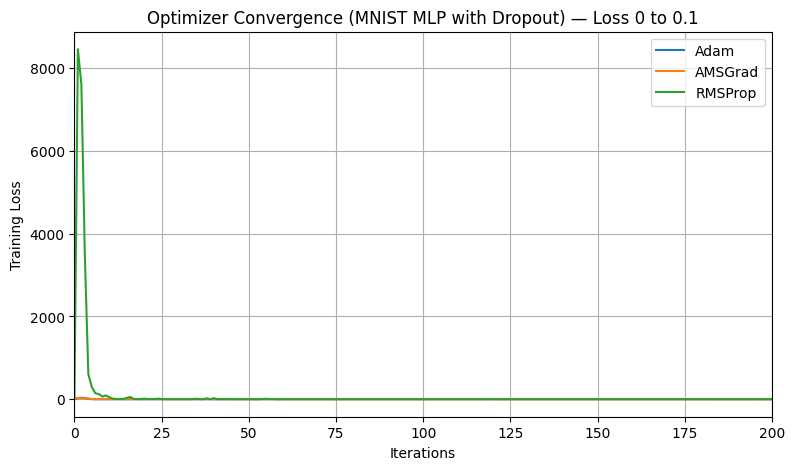

In [ ]:
plt.figure(figsize=(9,5))

for opt in optimizers:
    losses = results[opt]
    iterations = list(range(len(losses)))
    plt.plot(iterations, losses, label=opt)

plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Optimizer Convergence (MNIST MLP with Dropout) — Loss 0 to 0.1")
# plt.ylim(0, 1)
plt.xlim(0, 200)
plt.legend()
plt.grid(True)
plt.show()